In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import imageio
import os
import glob
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
#from Ramsey_Sequence import Ramsey_Sequence

In [2]:
class Ramsey_Sequence:
    def __init__(self,func):
        self.func = func
        self.state = np.array([0.0,0.0,1.0])
        self.time = 0.0
        self.timearray = np.array([])
        self.history = np.array([])
    def evolve(self,kernel):
        self.kernel = kernel
        self.rabi = self.kernel.rabi
        self.detuning = self.kernel.detuning
        self.time_interval = self.kernel.time_interval
        dt = 0.0001
        timestep = int(self.time_interval/dt)+1
        t_span = np.linspace(self.time,self.time+self.time_interval,timestep)
        history_temp = odeint(self.func.obe,self.gcs(),t_span,args=(self.rabi,self.detuning))
        self.history = np.append(self.history,history_temp)
        self.history = self.history.reshape(-1,3)
        self.state = self.history[-1,:]
        self.time += self.time_interval
        self.timearray = np.append(self.timearray,t_span)
    def bloch_u(self):
        return self.history[:,0]
    def bloch_v(self):
        return self.history[:,1]
    def bloch_w(self):
        return self.history[:,2]
    def gcs(self):#get current state
        return self.state
    def gct(self):#ger current time
        return self.time
    def gta(self):#get time array
        return self.timearray
    def makePlot(self):
        fig = plt.figure(1,facecolor='white',figsize=(5,5))
        ax=fig.add_axes([0.0, 0.0, 1.0, 1.0])
        ax.plot(self.gta(),self.bloch_u(),'.',color=[170.0/255.0,43.0/255.0,74.0/255.0])
        ax.plot(self.gta(),self.bloch_v(),'.',color=[0,99.0/255.0,136.0/255.0])
        ax.plot(self.gta(),self.bloch_w(),'.',color=[126.0/255.0,49.0/255.0,123.0/255.0])
        plt.show()
    def makePng(self):
        plt.ioff() # turns off plot display
        plt.rcParams.update({'figure.figsize':(16,16)})
        plt.rcParams['figure.dpi'] = 50
        # define points for Bloch sphere wire frame
        u = np.linspace(0.0,2*np.pi,90)
        v = np.linspace(0.0,np.pi,180)
        lu = np.size(u)
        lv = np.size(v)
        x = np.zeros((lu,lv))
        y = np.zeros((lu,lv))
        z = np.zeros((lu,lv))
        for uu in range(0,lu):
            for vv in range(0,lv):
                x[uu,vv]= np.cos(u[uu])*np.sin(v[vv])
                y[uu,vv]= np.sin(u[uu])*np.sin(v[vv])
                z[uu,vv]= np.cos(v[vv])
        
        persist=15 #no of fading out points to include
        trans=np.arange(1.0,0.0,-1.0/(persist+1))
                
        tic = time.perf_counter() # make images and save as pngs             
        for ii in range(0,persist):
            fig = plt.figure()
            ax=Axes3D(fig)
            ax.axis('off')
            ax.view_init(elev=22.5,azim=-10)
            ax.set_xlim(-1.1,1.1)
            ax.set_ylim(-1.1,1.1)
            ax.set_zlim(-1.1,1.1)
            surf = ax.plot_wireframe(x, y, z, rstride=9, cstride=15, linewidth=5, color=[159.0/255.0,161.0/255.0,97.0/255.0], alpha=0.25)
            for jj in range(0,ii):
                ax.scatter3D(self.bloch_u()[ii-jj],self.bloch_v()[ii-jj],self.bloch_w()[ii-jj],alpha=trans[jj]**2,c=[1.0],cmap='hsv',s=1000)
            plt.savefig('bloch_vec_'+str(1000+ii)+'.png',format='png',dpi=30,bbox_inches='tight')
            plt.close(fig)    
        for ii in range(persist,len(self.gta())):
            fig = plt.figure()
            ax=Axes3D(fig)
            ax.axis('off')
            ax.view_init(elev=22.5,azim=-10)
            ax.set_xlim(-1.1,1.1)
            ax.set_ylim(-1.1,1.1)
            ax.set_zlim(-1.1,1.1)
            surf = ax.plot_wireframe(x, y, z, rstride=9, cstride=15, linewidth=5, color=[159.0/255.0,161.0/255.0,97.0/255.0],alpha=0.25)
            for jj in range(0,persist):
                ax.scatter3D(self.bloch_u()[ii-jj],self.bloch_v()[ii-jj],self.bloch_w()[ii-jj], alpha=trans[jj]**2,c=[1.0],cmap='hsv',s=1000)
            plt.savefig('bloch_vec_'+str(1000+ii)+'.png',format='png',dpi=30,bbox_inches='tight')
            plt.close(fig)
        toc = time.perf_counter()
        print(f"Time to write pngs: {toc - tic:0.4f} seconds")



class optical_bloch:
    def obe(bloch,t,omega,delta):
        gamma=0.0
        return np.array([-0.5*gamma*bloch[0]-delta*bloch[1],-0.5*gamma*bloch[1]+delta*bloch[0]-omega*bloch[2],-1.0*gamma*(bloch[2]-1)+omega*bloch[1]]) 

class halfpipulse:
    rabi = 74.0*np.pi
    detuning = 0.0
    time_interval = 0.5*np.pi/np.sqrt(rabi**2 + detuning**2)
    
class pipulse:
    rabi = 74.0*np.pi
    detuning = 0.0
    time_interval = np.pi/np.sqrt(rabi**2 + detuning**2)
    
class freepulse:
    rabi = 0.0
    detuning = 74.0*np.pi
    time_interval = 0.1
    
class Hadamard:
    rabi = 74.0*np.pi
    detuning = 74.0*np.pi
    time_interval = np.pi/np.sqrt(rabi**2 + detuning**2)
    

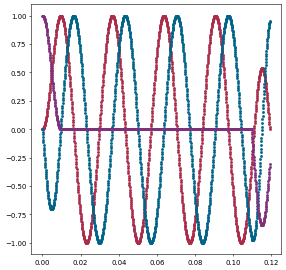

In [7]:
pulse = Ramsey_Sequence(optical_bloch)
pulse.evolve(Hadamard)
pulse.evolve(freepulse)
pulse.evolve(Hadamard)
pulse.makePlot()

In [5]:
pulse.makePng()

Time to write pngs: 272.6004 seconds


In [6]:
tic = time.perf_counter() # make pngs into gif

def find_all_png():
    pngs = glob.glob("bloch_vec_*.png")
    pngs.sort()
    buf = []
    for png in pngs:
        buf.append(png)
    return buf

def cr_gif(image_list, gif_name):
    frames = []
    for image_name in image_list:
        frames.append(imageio.imread(image_name))
        # Save them as frames into a gif
    imageio.mimsave(gif_name, frames, 'GIF', duration=0.05)

buf = find_all_png()
cr_gif(buf, 'ramsey.gif') 
toc = time.perf_counter()
print(f"Time to write gif: {toc - tic:0.4f} seconds")

tic = time.perf_counter() # delete pngs
for f in glob.glob('bloch_vec_*.png'):
    os.remove(f)    
toc = time.perf_counter()
print(f"Time to delete pngs: {toc - tic:0.4f} seconds")

Time to write gif: 27.4638 seconds
Time to delete pngs: 0.0969 seconds


In [10]:
pulse1 = Ramsey_Sequence(optical_bloch)
pulse1.evolve(halfpipulse)
pulse1.evolve(freepulse)
pulse1.evolve(halfpipulse)

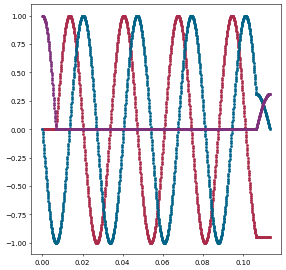

In [12]:
pulse1.makePlot()

In [13]:
pulse1.makePng()

Time to write pngs: 276.3731 seconds


In [14]:
tic = time.perf_counter() # make pngs into gif
buf = find_all_png()
cr_gif(buf, 'ramsey1.gif') 
toc = time.perf_counter()
print(f"Time to write gif: {toc - tic:0.4f} seconds")

tic = time.perf_counter() # delete pngs
for f in glob.glob('bloch_vec_*.png'):
    os.remove(f)    
toc = time.perf_counter()
print(f"Time to delete pngs: {toc - tic:0.4f} seconds")

Time to write gif: 26.9679 seconds
Time to delete pngs: 0.1628 seconds
